# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
medical = pd.read_csv('/Users/magdalenamasello/Documents/Work/DataScience/Bootcamp/Projects/Unit_11/insurance2.csv')

In [2]:
medical.shape

(1338, 8)

In [3]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

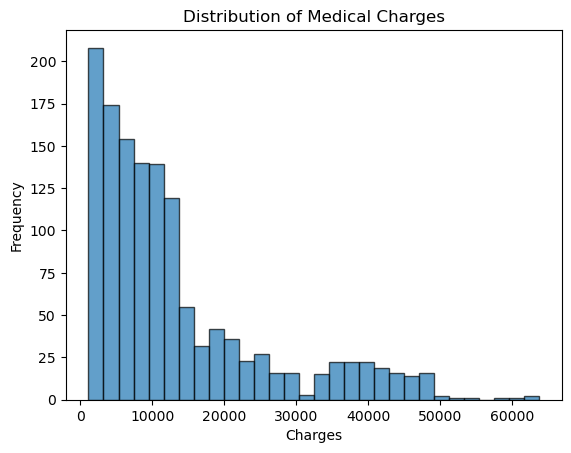

Mean of charges: 13270.422265141257
Standard deviation of charges: 12110.011236693996


In [4]:
plt.hist(medical['charges'], bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.title('Distribution of Medical Charges')
plt.show()

# Calculate the mean and standard deviation
mean_charges = np.mean(medical['charges'])
std_charges = np.std(medical['charges'], ddof=1)

print("Mean of charges:", mean_charges)
print("Standard deviation of charges:", std_charges)

__Comment:__ The histogram of charges shows a right-skewed distribution. Due to the Central Limit Theorem, the sampling distribution of the mean can still be approximated as normal if the sample size is large enough, which seems appropriate here given the sample size of 1338.

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ Given that we have a random sample of medical charges, we can use these data to make inferences about the population mean charge. The Central Limit Theorem allows us to assume that the sampling distribution of the sample mean is approximately normal, even if the original data are not perfectly normal, due to the large sample size (n = 1338).

The most appropriate frequentist test to apply here is the one-sample t-test. This test will help us determine if the sample mean is significantly different from the hypothesized population mean of 12,000.

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__ Since the administrator is concerned about the mean charge falling below 12,000, we should use a one-sided confidence interval.

In [5]:
from scipy.stats import t

# Sample size
n = len(medical['charges'])

# Degrees of freedom
df = n - 1

# Mean and standard deviation of the sample
mean_sample = np.mean(medical['charges'])
std_sample = np.std(medical['charges'], ddof=1)

# Calculate the critical t-value for a 95% confidence level (one-sided)
t_critical = t.ppf(0.95, df)

# Calculate the margin of error
margin_of_error = t_critical * (std_sample / np.sqrt(n))

# Calculate the lower bound of the confidence interval
ci_lower = mean_sample - margin_of_error

print("Critical t-value:", t_critical)
print("Margin of error:", margin_of_error)
print("95% confidence interval lower bound:", ci_lower)

Critical t-value: 1.6459941145571317
Margin of error: 544.9350813250252
95% confidence interval lower bound: 12725.48718381623


__Comment:__ Since the lower bound of the confidence interval (approximately 12725) is above 12,000, the administrator should not be concerned about the average charge falling below 12,000 based on this sample.

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__ 

Null Hypothesis (H0): The mean charges for people with insurance and those without are equal.

Alternative Hypothesis (Ha): The mean charges for people with insurance and those without are not equal. 

Assumption about the variances:
We are assuming that the variances of the two groups (those with insurance and those without insurance) are equal. This assumption allows us to pool the variances when calculating the test statistic.

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [6]:
from scipy.stats import ttest_ind

# Separate the charges into two groups
insured = medical[medical['insuranceclaim'] == 1]['charges']
uninsured = medical[medical['insuranceclaim'] == 0]['charges']

# Sample sizes
n0 = len(uninsured)
n1 = len(insured)

# Means
mean0 = np.mean(uninsured)
mean1 = np.mean(insured)

# Standard deviations
std0 = np.std(uninsured, ddof=1)
std1 = np.std(insured, ddof=1)

# Calculate the pooled standard deviation
sp = np.sqrt(((n0 - 1) * std0**2 + (n1 - 1) * std1**2) / (n0 + n1 - 2))

# Calculate the t-statistic
t_stat = (mean0 - mean1) / (sp * np.sqrt(1/n0 + 1/n1))

# Degrees of freedom
df = n0 + n1 - 2

# Calculate the p-value from the t-distribution
p_value = 2 * (1 - t.cdf(np.abs(t_stat), df))

print("Manual calculation:")
print("t-statistic:", t_stat)
print("p-value:", p_value)

# Using scipy.stats to perform the t-test
t_stat_scipy, p_value_scipy = ttest_ind(uninsured, insured)

print("Using scipy.stats:")
print("t-statistic:", t_stat_scipy)
print("p-value:", p_value_scipy)


Manual calculation:
t-statistic: -11.893299030876715
p-value: 0.0
Using scipy.stats:
t-statistic: -11.893299030876712
p-value: 4.461230231620717e-31


The p-value is significantly less than 0.05, so we reject the null hypothesis.
There is a statistically significant difference in charges between individuals with insurance and those without insurance.
The administrator can conclude that people with insurance are indeed charged a different amount than those without insurance.

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__ While scipy.stats does not provide a dedicated z-test function, it offers comprehensive support for t-tests, which are more generally applicable and versatile. For situations where a z-test is appropriate (known population standard deviation and large sample sizes), you can easily calculate the z-statistic and corresponding p-value manually using the normal distribution functions available in scipy.stats.

This approach aligns with the practical emphasis on using t-tests for real-world data analysis where the population standard deviation is typically unknown.

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test